<a href="https://www.kaggle.com/code/nomanrafi28/climate-change?scriptVersionId=204317751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/kaggle/input/climate-change-indicators/climate_change_indicators.csv')

In [3]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [5]:
df.dtypes

ObjectId       int64
Country       object
ISO2          object
ISO3          object
Indicator     object
              ...   
F2018        float64
F2019        float64
F2020        float64
F2021        float64
F2022        float64
Length: 72, dtype: object

In [6]:
df.sample()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
28,29,Brunei Darussalam,BN,BRN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.195,1.028,1.281,1.74,1.468,1.41,1.624,1.783,1.458,1.446


In [7]:
df.isnull().sum()

ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
F2018        12
F2019        12
F2020        13
F2021        12
F2022        12
Length: 72, dtype: int64

In [8]:
df.tail()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686
224,225,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.118,0.025,0.970,1.270,0.088,0.453,0.925,0.389,-0.125,-0.490


In [9]:
df.shape

(225, 72)

In [10]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [11]:
df['Country']

0      Afghanistan, Islamic Rep. of
1                           Albania
2                           Algeria
3                    American Samoa
4          Andorra, Principality of
                   ...             
220                  Western Sahara
221                           World
222                  Yemen, Rep. of
223                          Zambia
224                        Zimbabwe
Name: Country, Length: 225, dtype: object

In [12]:
# Assuming 'Country' is the column with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [13]:
df.shape

(225, 733)

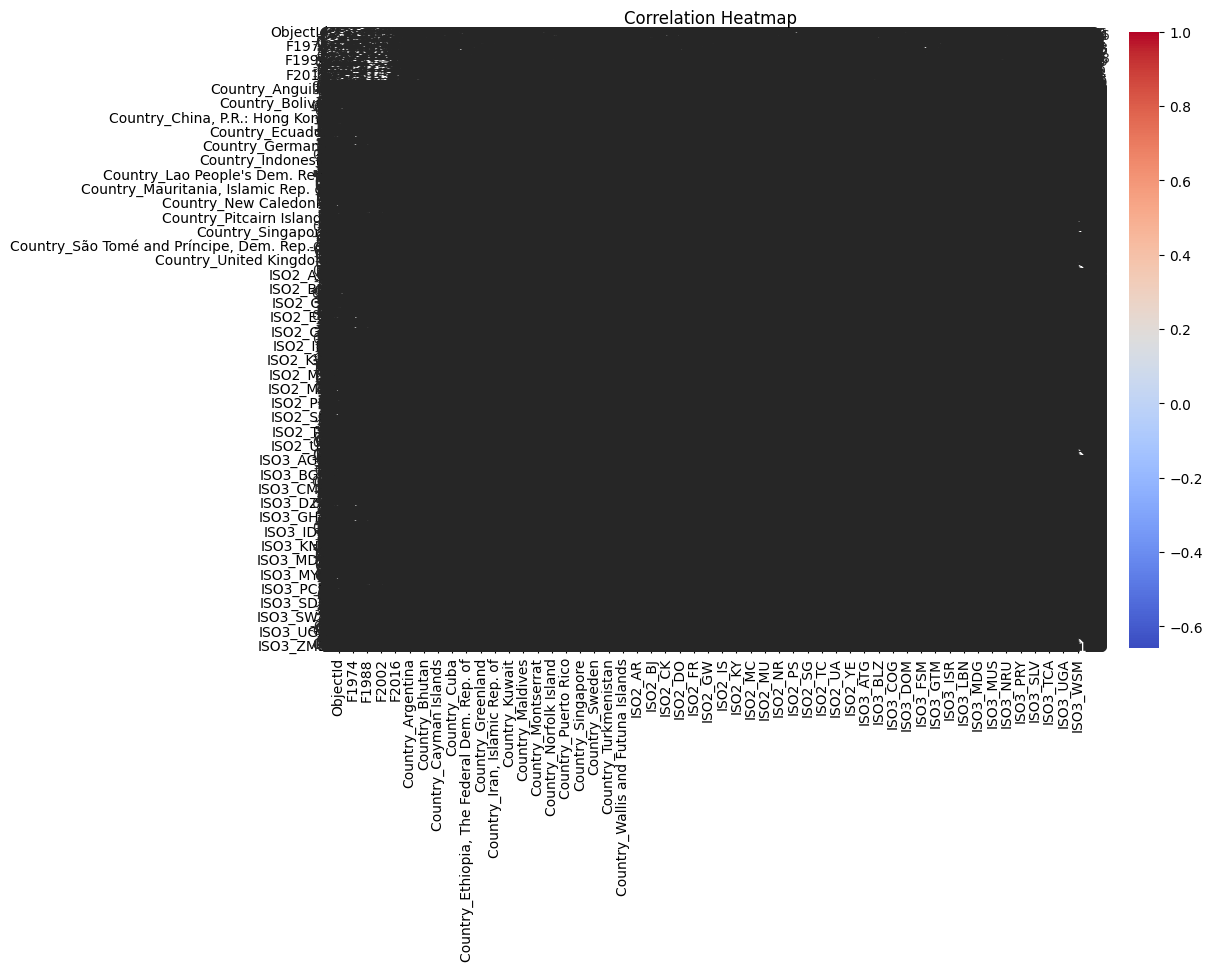

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# todummy_list = ['max_ndvi', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

# def dummy_df(df, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(df[x], prefix=x)
#         df = df.drop(x, axis=1)
#         df = pd.concat([df, dummies], axis=1)
#     return df

# X = dummy_df(X, todummy_list)

In [16]:
# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=.2, random_state=1)

In [17]:
# from sklearn.metrics import accuracy_score

In [18]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(xtrain, ytrain)
# lr.score(xtest,ytest

In [19]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(xtrain, ytrain)
# rf.score(xtest,ytest)

In [20]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(X, Y)
# prediction = rf.predict(test)